In [6]:
import pandas as pd
import quantstats as qs
from time_utils import as_moscow_timezone

# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [19]:
df = pd.read_csv("total_pnl.csv")
df.set_index(pd.DatetimeIndex(df["time_utc"]), inplace=True)
df.sort_index(inplace=True)
df.tz_localize(None)
df["pnl_returns"]=df["total_pnl"]/df["close"]
df
#df["total_pnl_cum"].plot()

,time_utc,open,close,quantity,commission,trading_pnl,quantity_cum,mtm_pnl,total_pnl,total_pnl_cum,pnl_returns
time_utc,,,,,,,,,,,
2024-12-02 06:00:00+00:00,2024-12-02 06:00:00+00:00,237.02,237.85,-10.0,-1.18925,0.0,-10.0,NaN,NaN,NaN,NaN
2024-12-02 07:00:00+00:00,2024-12-02 07:00:00+00:00,237.09,237.61,0.0,0.00000,0.0,-10.0,2.4,2.4,2.4,0.010101
2024-12-02 08:00:00+00:00,2024-12-02 08:00:00+00:00,237.64,237.00,0.0,0.00000,0.0,-10.0,6.1,6.1,8.5,0.025738
2024-12-02 09:00:00+00:00,2024-12-02 09:00:00+00:00,236.98,235.70,0.0,0.00000,0.0,-10.0,13.0,13.0,21.5,0.055155
2024-12-02 10:00:00+00:00,2024-12-02 10:00:00+00:00,235.72,235.70,0.0,0.00000,0.0,-10.0,-0.0,0.0,21.5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
2024-12-06 11:00:00+00:00,2024-12-06 11:00:00+00:00,233.89,235.89,-20.0,-2.33760,-42.6,-10.0,-20.4,-63.0,-13.2,-0.267074
2024-12-06 12:00:00+00:00,2024-12-06 12:00:00+00:00,235.87,236.80,20.0,-2.36400,8.0,10.0,9.1,17.1,3.9,0.072213
2024-12-06 13:00:00+00:00,2024-12-06 13:00:00+00:00,236.80,237.02,-20.0,-2.36820,-4.0,-10.0,-2.2,-6.2,-2.3,-0.026158


<Axes: xlabel='time_utc'>

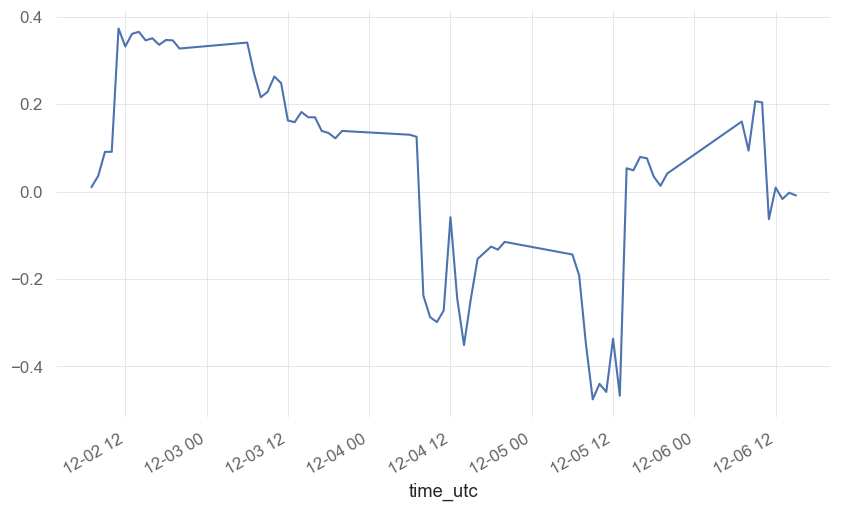

In [22]:
df["pnl_returns"].cumsum().plot()

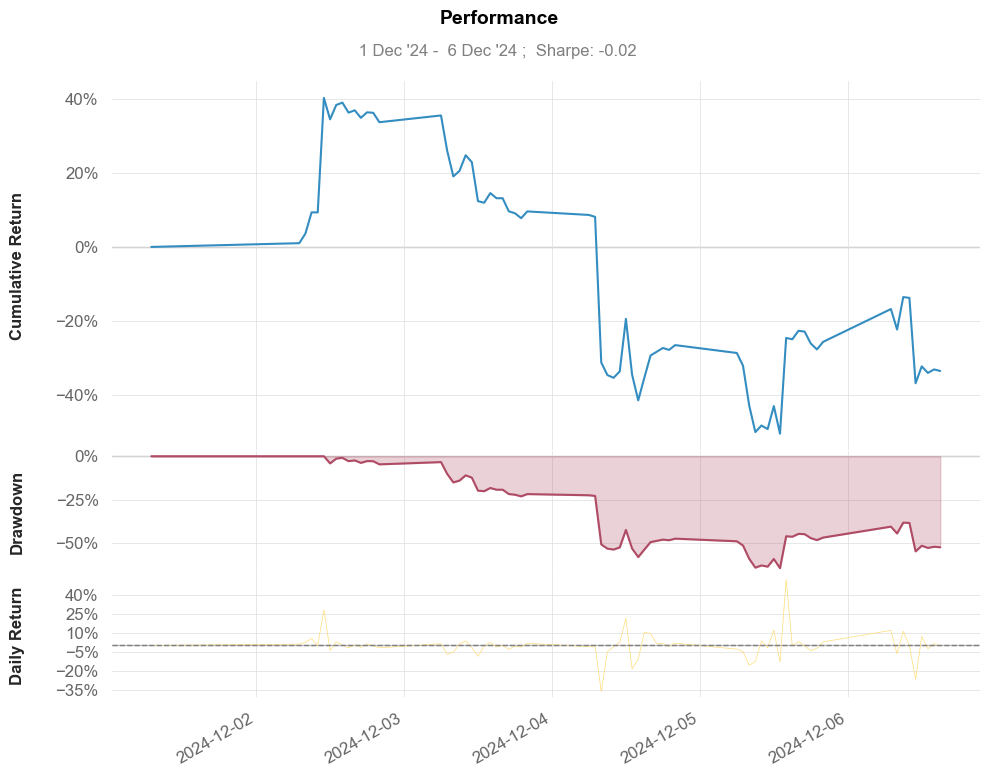

In [21]:
qs.plots.snapshot(df["pnl_returns"], title='Performance', show=True)

                    Strategy
------------------  ----------
Start Period        2024-12-02
End Period          2024-12-06
Risk-Free Rate      0.0%
Time in Market      98.0%

Cumulative Return   -33.46%
CAGR﹪              -100.0%

Sharpe              -0.02
Prob. Sharpe Ratio  49.61%
Sortino             -0.03
Sortino/√2          -0.02
Omega               1.0

Max Drawdown        -64.6%
Longest DD Days     5

Gain/Pain Ratio     -0.02
Gain/Pain (1M)      -1.0

Payoff Ratio        1.27
Profit Factor       1.0
Common Sense Ratio  0.81
CPC Index           0.56
Tail Ratio          0.82
Outlier Win Ratio   5.43
Outlier Loss Ratio  5.34

MTD                 -33.46%
3M                  -33.46%
6M                  -33.46%
YTD                 -33.46%
1Y                  -33.46%
3Y (ann.)           -100.0%
5Y (ann.)           -100.0%
10Y (ann.)          -100.0%
All-time (ann.)     -100.0%

Avg. Drawdown       -64.6%
Avg. Drawdown Days  5
Recovery Factor     0.01
Ulcer Index         0.39
Serenity In

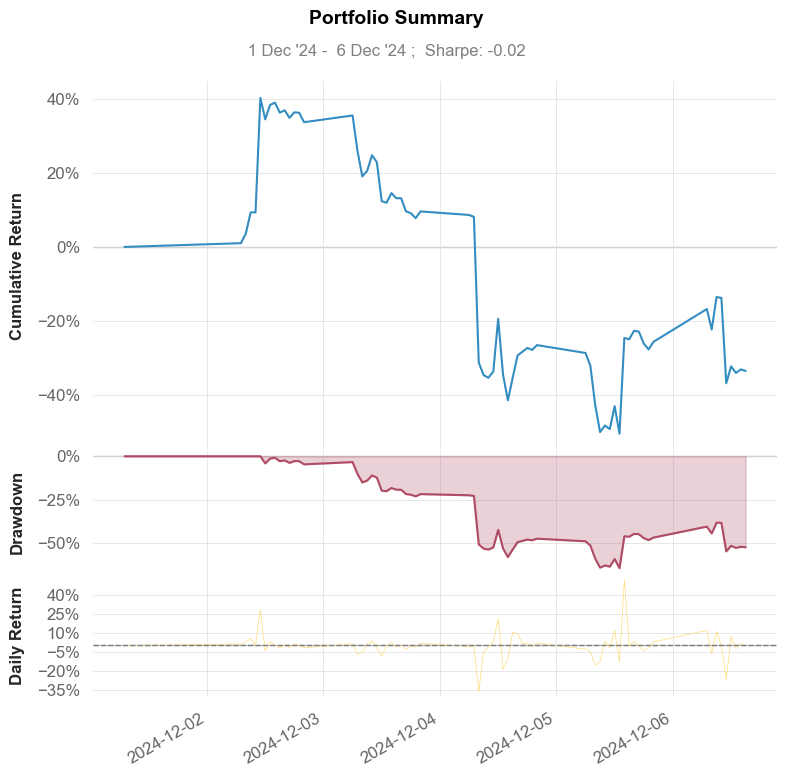

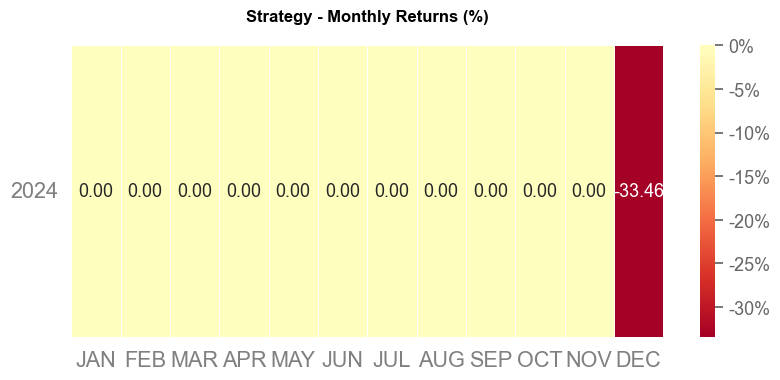

In [24]:
qs.reports.basic(df["pnl_returns"], title='Performance', show=True)